In [4]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import torch
from torch.utils.data import TensorDataset
import warnings
warnings.filterwarnings('ignore')

In [6]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import pandas as pd
import seaborn as sns
import torch.nn.functional as F

In [34]:
#train_dataset = MNIST(root='.', train=True, download=True, transform=transform)
#test_dataset = MNIST(root='.', train=False, download=True, transform=transform)

# Define transform to normalize data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std deviation for MNIST
])

# Load MNIST dataset with transformations
train_dataset = MNIST(root='./data', train=True, download=False, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=False, transform=transform)

In [36]:
# Example: reduce size of datasets
train_size = int(0.1 * len(train_dataset))
test_size = int(0.1 * len(test_dataset))

# Create reduced datasets
train_data_reduced = train_dataset.data[:train_size].float() / 255.0
train_labels_reduced = train_dataset.targets[:train_size].long()

test_data_reduced = test_dataset.data[:test_size].float() / 255.0
test_labels_reduced = test_dataset.targets[:test_size].long()

# Create TensorDataset instances
train_data = TensorDataset(train_data_reduced, train_labels_reduced)
test_data = TensorDataset(test_data_reduced, test_labels_reduced)

print("Type of train_dataset:", type(train_dataset))

Type of train_dataset: <class 'torchvision.datasets.mnist.MNIST'>


In [42]:
#verify attributes
print("Type:", type(train_data))

Type: <class 'torch.utils.data.dataset.TensorDataset'>


In [213]:
print("Train data shape:", train_data_reduced.shape)
print("Train labels shape:", train_labels_reduced.shape)
print("Test data shape:", test_data_reduced.shape)
print("Test labels shape:", test_labels_reduced.shape)

Train data shape: torch.Size([5, 784])
Train labels shape: torch.Size([6000])
Test data shape: torch.Size([1000, 28, 28])
Test labels shape: torch.Size([1000])


In [215]:
train_data_reduced=X.view(-1, 784)
print(train_data_reduced.shape)

torch.Size([5, 784])


In [63]:
# normalize data to [0 1] from 0 to 255 (max)
#train_dataNorm = train_data / 255.0  # Convert to float and normalize
# Plotting the histograms
#fig, ax = plt.subplots(1, figsize=(10, 4))
#ax.hist(train_data.flatten().numpy(), bins=50)
#ax.set_xlabel('Pixel intensity values')
#ax.set_ylabel('Count')
#ax.set_title('Histogram of normalized data')
#ax.set_yscale('log')  # set to log scale
#convert into data loading format 
#train_data   = torch.tensor(train_dataNorm).float()
#train_labels = torch.tensor(train_labels).long() # long = int64

In [65]:
#don't need data loader for Autoencode
#batch_size = 128
# Create DataLoader instances
#train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
#test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=False)
# Example: printing lengths of DataLoader batches
#print("Number of batches in train_loader:", len(train_loader))
#print("Number of batches in test_loader:", len(test_loader))


In [67]:
# check all variables in workspace
#%whos

In [217]:
#create model class instead 
def createmodel():

  class autoencode(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,128)
      
      ### encoder layer
      self.enc = nn.Linear(128,64)

      ### latent layer
      self.lat = nn.Linear(64,64)

      ### decoder layer
      self.dec = nn.Linear(64,784)

    # forward pass
    def forward(self,x):
      x = x.view(-1, 784)  # Flatten to 784 
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y = torch.sigmoid( self.dec(x) )
      return y
        
  # create the model instance
  net = autoencode()
  
  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
    #torch.optim.Adam or .SGD
  return net,lossfun,optimizer

In [219]:
# test the model with one batch
net,lossfun,optimizer = createmodel()

X = train_data_reduced[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


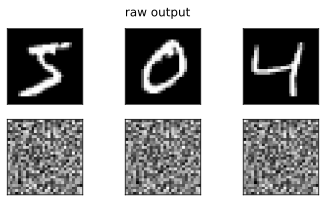

In [221]:
#plotting
fig,axs = plt.subplots(2,3,figsize=(6,3))

for i in range(3):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('raw output')
plt.show()

In [209]:
print(train_data_reduced.shape)

torch.Size([5, 784])


In [267]:
# a function that trains the model
def trainmodel():
    # number of epochs
    numepochs = 500
    # create a new model
    net, lossfun, optimizer = createmodel()
    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []   
    # loop over epochs
    for epoch in range(numepochs):
        randomidx = np.random.choice(train_data_reduced.shape[0],size=5)
        X = train_data_reduced[randomidx]   #[randomidx,:]
        X = X.view(-1, 784)
        # forward pass and loss
        yHat = net(X)
        loss = lossfun(yHat,X)    
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses[epoch] = loss.item()
     # function output
    return losses,net
print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


In [269]:
print(X.shape)

torch.Size([5, 784])


In [271]:
#print(yHat) #log of probabilities that model is outputting 
#print(torch.exp(yHat)) #convert back to prob
##print(loss) #final check things work 

Final loss: 0.0006


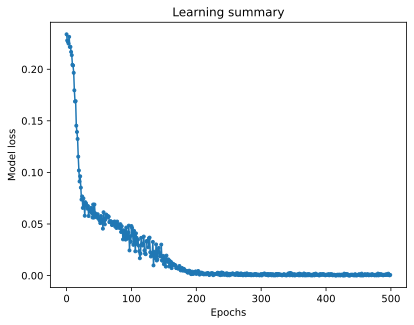

In [273]:
# train the model (90s)
losses,net = trainmodel()
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Learning summary')
plt.show()

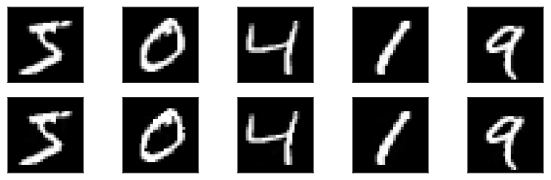

In [275]:
# Repeat the visualization when testing the model
X = train_data_reduced[:5,:]
yHat = net(X)
# model changes
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
plt.show()

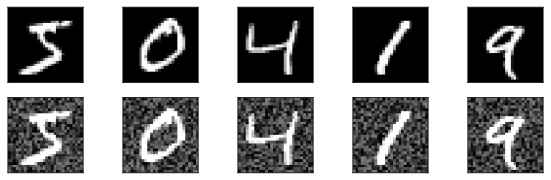

In [281]:
#make it harder by adding noise 
# grab a small set of images
X = train_data_reduced[:10,:]
# add noise
Xnoise = X + torch.rand_like(X)/2
# clip at 1
Xnoise[Xnoise>1] = 1
# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.show()

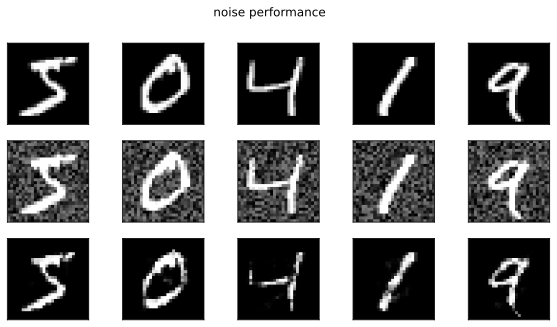

In [298]:
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.suptitle('noise performance')
plt.show()